In [ ]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python
!pip install q keras==2.4.3
# !pip install tensorflow==2.4.1
!pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras
!pip install pydrive

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-njz4f6r2
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-njz4f6r2


In [31]:
# got segmented image, proceed to electrodes
!pip install git+https://github.com/pulse2percept/pulse2percept
import pulse2percept as p2p
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

from google.colab import drive
drive.mount('/content/drive')

  Cloning https://github.com/pulse2percept/pulse2percept to /tmp/pip-req-build-_5w2f0rp
  Running command git clone -q https://github.com/pulse2percept/pulse2percept /tmp/pip-req-build-_5w2f0rp
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12

def generate_segmentation(idx):
  model = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset

  # model = pspnet_101_cityscapes() # load the pretrained model trained on Cityscapes dataset

  # model = pspnet_101_voc12() # load the pretrained model trained on Pascal VOC 2012 dataset

  # load any of the 3 pretrained models

  out = model.predict_segmentation(
      inp='/content/drive/Shareddrives/Bionic_Eye_IoT_Data/' + str(idx) + '_input.jpeg',
      out_fname='/content/drive/Shareddrives/Bionic_Eye_IoT_Data/' + str(idx) + '_output.jpeg'
  )

In [62]:
def get_electrode_name(l):
  names = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z',26:'AA',27:'AB',28:'AC',29:'AD',30:'AE',31:'AF',32:'AG',33:'AH',34:'AI',35:'AJ',36:'AK',37:'AL',38:'AM',39:'AN'}
  d = {}
  for e in l:
    d[names[e[0]]+str(e[1]+1)] = 1
  return d  

In [63]:
def generate_percept(idx):
  img = cv2.imread('/content/drive/Shareddrives/Bionic_Eye_IoT_Data/' + str(idx) + '_output.jpeg')
  plt.imshow(img)

  length = len(img[0])
  height = len(img)
  print(length,height)
  # from collections import defaultdict

  # key = sumRGB, val = list of pixel tuples [(1,1),(2,2)]
  pixel_vals = defaultdict(list)

  for i in range(0,height,height//39):
    for j in range(0,length,length//39):
      key = sum(img[i][j])
      val = (i//(height//39),j//(length//39))
      pixel_vals[key].append(val)

  # print(pixel_vals)

  # check the color that most electrodes are mapped to
  color_idx = -1
  most_electrodes = 0
  for k,v in pixel_vals.items():
    if len(v)>most_electrodes:
      most_electrodes = len(v)
      color_idx = k
  print(color_idx)
  print(len(pixel_vals[color_idx]))
  mask_1 = get_electrode_name(pixel_vals[color_idx])

  implant = p2p.implants.AlphaAMS()
  implant.stim=mask_1
  implant.plot()

  # Set up the model and build it:
  model = p2p.models.ScoreboardModel()
  model.build()

  # Predict the percept and plot it:
  percept = model.predict_percept(implant)
  percept.plot()
  percept.save('/content/drive/Shareddrives/Bionic_Eye_IoT_Data/' + str(idx) + '_percept.jpeg')

519 400
282
277


Created /content/drive/Shareddrives/Bionic_Eye_IoT_Data/1_percept.jpeg.


712 512
443
819


Created /content/drive/Shareddrives/Bionic_Eye_IoT_Data/2_percept.jpeg.


1800 1200
589
760


Created /content/drive/Shareddrives/Bionic_Eye_IoT_Data/3_percept.jpeg.


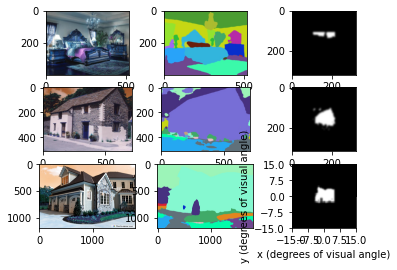

In [65]:
num_imgs = 3
f, axarr = plt.subplots(num_imgs, 3) 

for idx in range (1, num_imgs + 1):
  generate_segmentation(idx)
  generate_percept(idx)

  axarr[idx - 1, 0].imshow(cv2.imread('/content/drive/Shareddrives/Bionic_Eye_IoT_Data/' + str(idx) + '_input.jpeg'))
  axarr[idx - 1, 1].imshow(cv2.imread('/content/drive/Shareddrives/Bionic_Eye_IoT_Data/' + str(idx) + '_output.jpeg'))
  axarr[idx - 1, 2].imshow(cv2.imread('/content/drive/Shareddrives/Bionic_Eye_IoT_Data/' + str(idx) + '_percept.jpeg'))